In [1]:
from sentence_transformers import SentenceTransformer
import umap
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\adgro\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\adgro\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\adgro\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is

In [2]:
import pandas as pd

file = pd.read_csv("formulas.csv")
formulas = file.apply(lambda row: ''.join(str(cell) for cell in row), axis=1)

In [3]:
res = 0
for i in formulas:
    res += len(i)
print(res)

18012246


In [9]:
model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = model.encode(formulas)

KeyboardInterrupt: 

In [7]:
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(embeddings)

C:\Users\adgro\AppData\Local\Temp\ipykernel_25380\3654143358.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding[:, 0], embedding[:, 1], cmap="Spectral", s=1)


Text(0.5, 1.0, "20'000 Latex formulas embedded into two dimensions by UMAP")

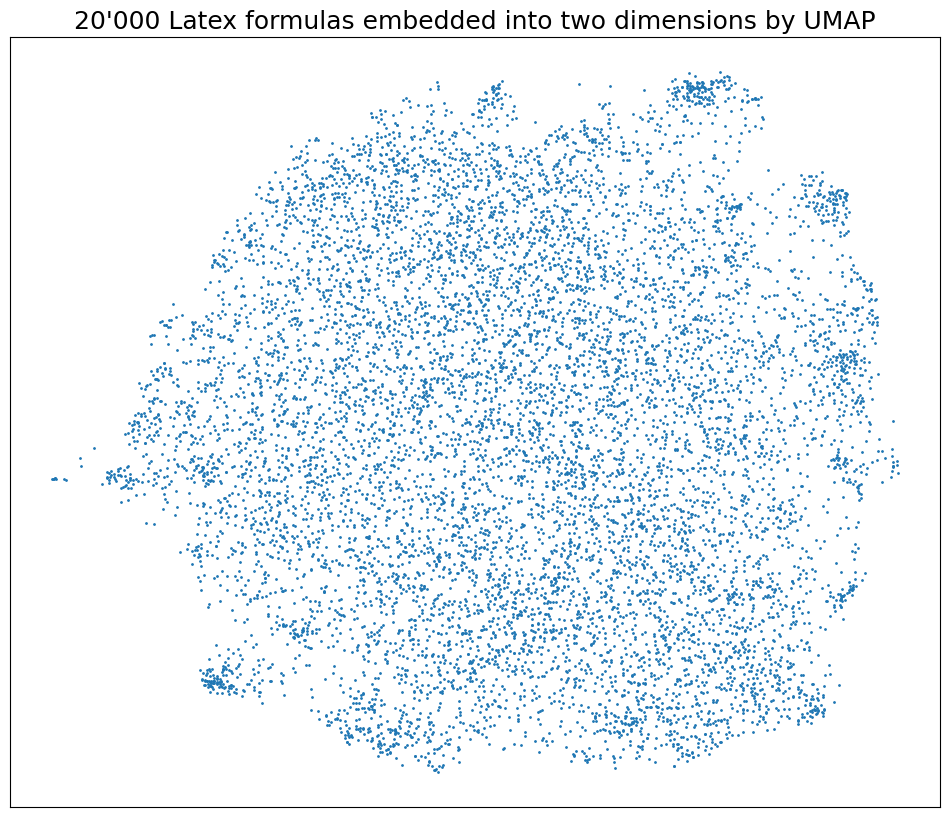

In [8]:
fig, ax = plt.subplots(figsize=(12, 10))
plt.scatter(embedding[:, 0], embedding[:, 1], cmap="Spectral", s=1)
plt.setp(ax, xticks=[], yticks=[])
plt.title("20'000 Latex formulas embedded into two dimensions by UMAP", fontsize=18)